In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

In [3]:
COE = pd.read_csv('CO2.csv', index_col = 0)
COE.head()

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,CO2 Emissions,CO2,Smog
1,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,200,6,3
2,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,263,4,5
3,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,232,5,6
4,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,242,5,6
5,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,230,5,7


In [4]:
COE.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 1 to 955
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model             955 non-null    int64  
 1   Make              955 non-null    object 
 2   Model.1           955 non-null    object 
 3   Vehicle Class     955 non-null    object 
 4   Engine Size       955 non-null    float64
 5   Cylinders         955 non-null    int64  
 6   Transmission      955 non-null    object 
 7   Fuel              955 non-null    object 
 8   Fuel Consumption  955 non-null    float64
 9   CO2 Emissions     955 non-null    int64  
 10  CO2               955 non-null    int64  
 11  Smog              955 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 97.0+ KB


# MACHINE LEARNING

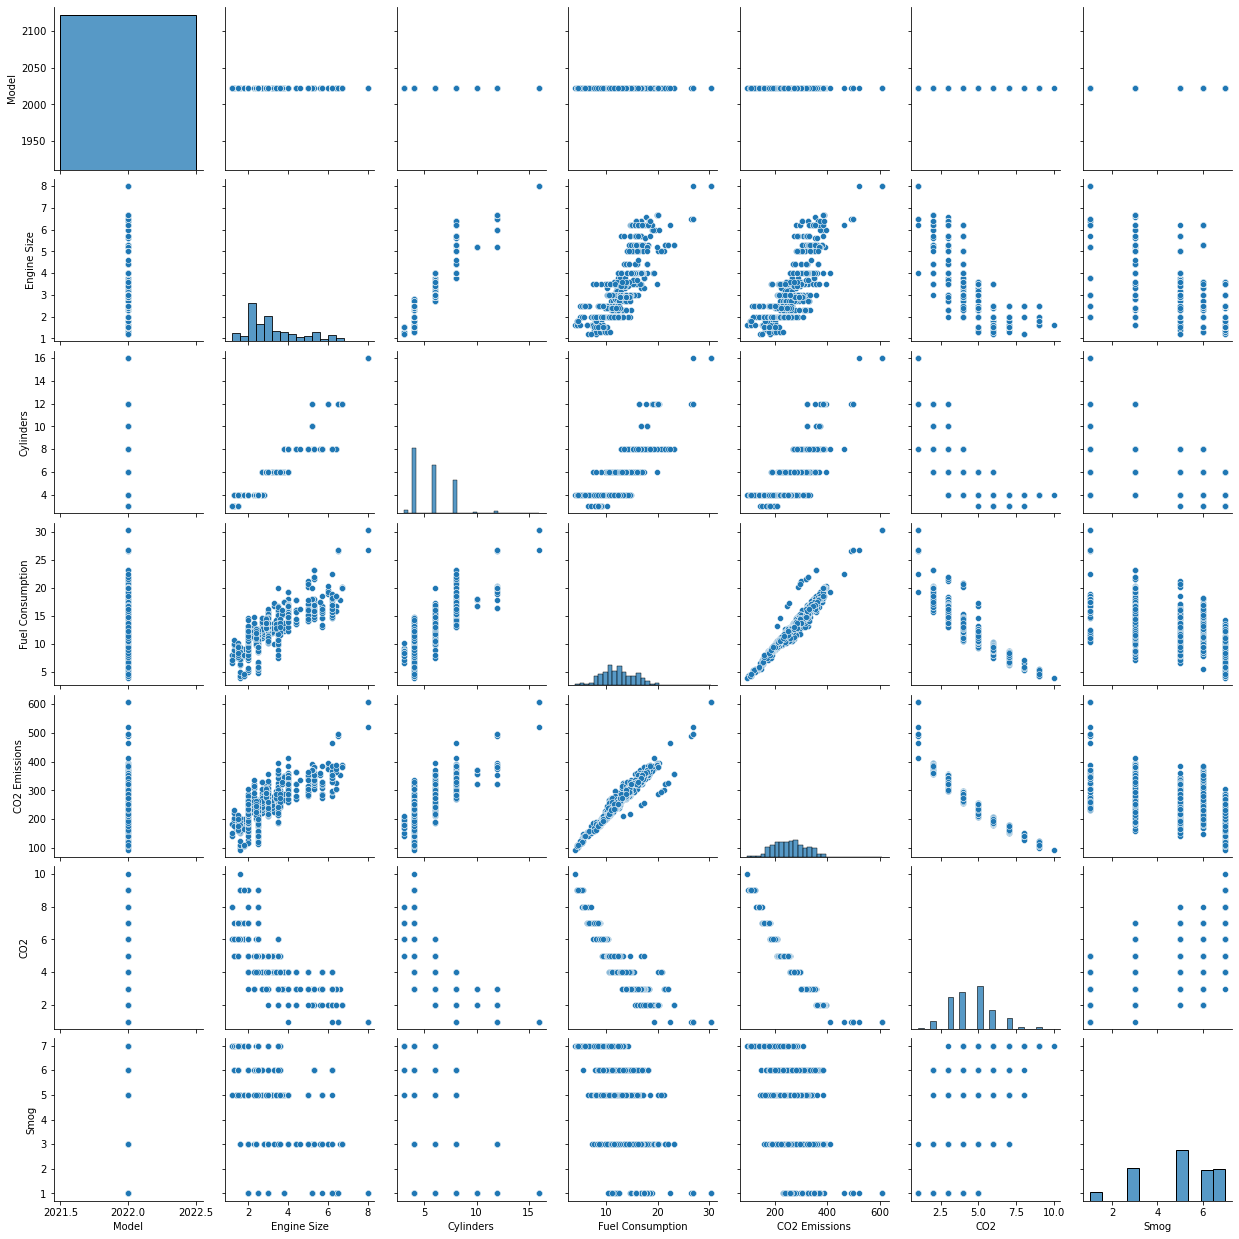

In [5]:
## EDA
sns.pairplot(COE)

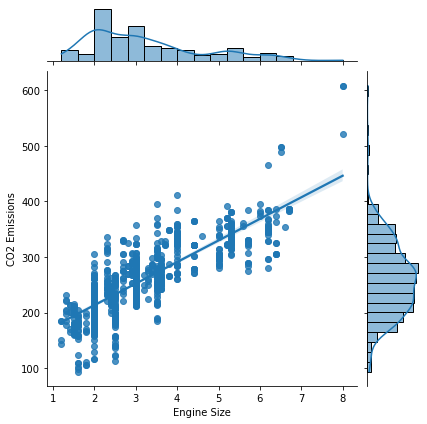

In [6]:
sns.jointplot(x = 'Engine Size', y = 'CO2 Emissions', data = COE, kind = 'reg' )

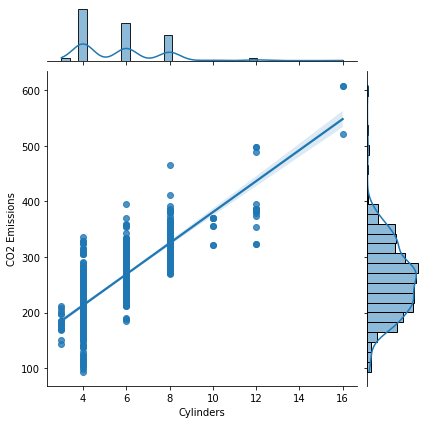

In [7]:
sns.jointplot(x = 'Cylinders', y = 'CO2 Emissions', data = COE, kind = 'reg' )

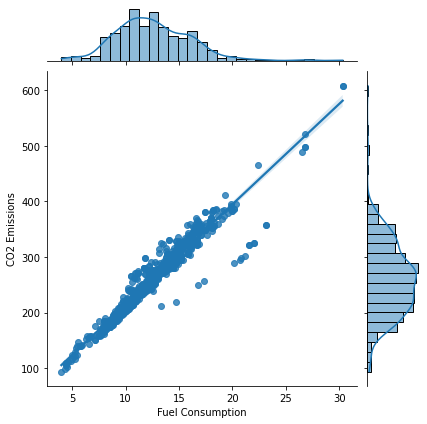

In [8]:
sns.jointplot(x = 'Fuel Consumption', y = 'CO2 Emissions', data = COE, kind = 'reg' )

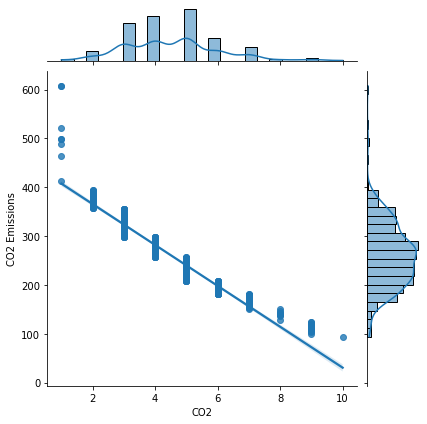

In [9]:
sns.jointplot(x = 'CO2', y = 'CO2 Emissions', data = COE, kind = 'reg' )

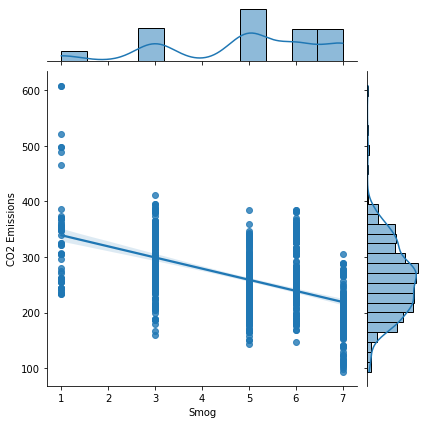

In [10]:
sns.jointplot(x = 'Smog', y = 'CO2 Emissions', data = COE, kind = 'reg' )

<AxesSubplot:>

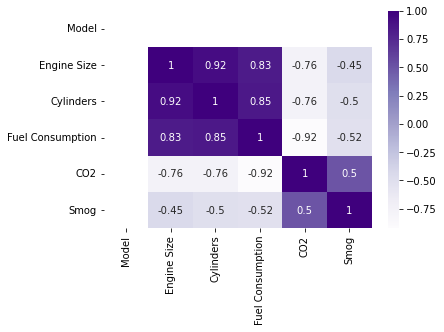

In [11]:
sns.heatmap(COE.drop('CO2 Emissions', axis = 1).corr(), annot =True, cmap = 'Purples')

<AxesSubplot:>

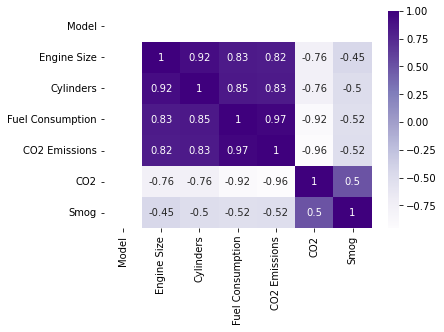

In [12]:
sns.heatmap(COE.corr(), annot =True, cmap = 'Purples')

Training and testing data We need to split pur data to to training and testing sets
Also, we need to separate the features and the label

In [13]:
X = COE[['Engine Size', 'Cylinders','Fuel Consumption','CO2','Smog']]
Y = COE['CO2 Emissions']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                   test_size = 0.3, random_state=101)

In [15]:
X_train

,Engine Size,Cylinders,Fuel Consumption,CO2,Smog
870,2.5,4,8.8,6,7
525,3.6,6,12.0,4,5
90,3.0,6,14.5,4,5
450,3.5,6,12.5,4,3
197,5.3,8,16.2,3,3
...,...,...,...,...,...
576,3.0,6,13.3,4,7
839,5.7,8,13.0,4,5
338,3.5,6,19.9,2,3
524,3.6,6,12.8,4,7


In [16]:
X_test

,Engine Size,Cylinders,Fuel Consumption,CO2,Smog
811,3.0,6,13.8,4,5
300,2.5,4,5.5,8,7
128,3.0,6,12.1,5,3
99,6.6,12,17.8,3,3
544,1.6,4,5.0,9,7
...,...,...,...,...,...
25,2.0,4,9.8,6,5
851,6.7,12,20.1,2,3
601,2.4,4,10.5,5,7
908,2.5,4,8.8,6,7


In [17]:
 Y_train

870    184
525    258
90     292
450    265
197    341
      ... 
576    279
839    275
338    395
524    274
864    210
Name: CO2 Emissions, Length: 668, dtype: int64

In [18]:
Y_test 

811    289
300    139
128    256
99     354
544    124
      ... 
25     205
851    386
601    221
908    184
684    200
Name: CO2 Emissions, Length: 287, dtype: int64

In [19]:
from sklearn.linear_model import LinearRegression
## ## Create an instance of a linear Regression model
model1 =LinearRegression()

In [20]:
### Now Train
model1.fit(X_train,Y_train)

LinearRegression()

In [21]:
model1.coef_

array([  0.57561536,   2.21227136,   9.48676834, -18.78244613,
         0.28147801])

In [ ]:
model1.intercept_

In [23]:
### To me we are trnasforming X_test to be a predicition tool
Prediction = model1.predict(X_test)

Text(0.5, 0, 'Actual values')

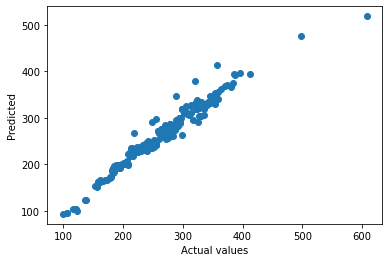

In [24]:
## x -axis = Y_test, 
## y_axis =Predicition
plt.scatter(Y_test,Prediction)
plt.ylabel('Predicted')
plt.xlabel('Actual values')

### The metrics for evaluating our model (model1) are:
1. Correlation coefficient (Pearson's r)
2. Coefficient of determination (R2)
3. Mean absolute error (MAE)
4. Mean square error (MSE)

###1  Correlation coefficient (Pearson's r)

In [25]:
from scipy.stats import pearsonr

corr, _ = pearsonr(Y_test, Prediction)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.979


2. Coefficient of determination (R2)

R2 = corr**2
R2

3. Mean absolute error (MAE)

In [27]:
## First convert the x and y values we have  i.e. Y_test and Prediction into arrays
Y_test, Prediction = np.array(Y_test), np.array(Prediction)

In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Prediction)

8.682412311395714

4. Mean square error (MSE)

In [33]:
## Work with the arrays still\
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Prediction)

175.07637515566074

CONCLUSION ON THE MACHINE LEARNING MODEL
### ALL OUR METRICS  SHOW THAT OUR MODEL IS A VERY GOOD MODEL ESPECIALLY LOOKING AT THE r and the R2 values